In [1]:
## Vectorized Implementation of Optimization Using Gradient Descent
# Define Cost function
def cost(t, h, l=l, X=X, y=y, m=m):
    cost = np.transpose(-y)@np.log(h) - np.transpose(1-y)@np.log(1-h) + (l/2)*np.transpose(t[1:])@t[1:]
    cost = (1/m)*cost
    return cost
# Define first derivative of cost function
def cost_dev(j, t, X=X, y=y, m=m):
    dev = X[:, j]@(1/(1 + np.exp(-X@theta)) - y)
    dev = (1/m)*dev
    return dev
# Define iterations
cost_list = []
theta_temp = np.zeros(theta.shape)
theta_list = []
for i in range(1000000):
    
    for j in range(len(theta)): 
        if j == 0:
            theta_temp[j] = theta[j] - a*cost_dev(j, theta)
        else:
            theta_temp[j] = theta[j]*(1 - (a*lmbd)/m) - a*cost_dev(j, theta)
    
    theta = theta_temp        
    hypo = 1/(1 + np.exp(-X@theta))
    
    theta_list.append(list(theta))
    cost_val = cost(theta, hypo)
    cost_list.append(cost_val)

NameError: name 'l' is not defined

In [2]:
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10000):
    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t0 = np.random.random(x.shape[1])
    t1 = np.random.random(x.shape[1])

    # total error, J(theta)
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])

    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
    
        # update theta
        t0 = temp0
        t1 = temp1

        # mean squared error
        e = sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) 

        if abs(J-e) <= ep:
            print 'Converged, iterations: ', iter, '!!!'
            converged = True
    
        J = e   # update error 
        iter += 1  # update iter
    
        if iter == max_iter:
            print 'Max interactions exceeded!'
            converged = True

    return t0,t1

if __name__ == '__main__':

    x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 
    print 'x.shape = %s y.shape = %s' %(x.shape, y.shape)
 
    alpha = 0.01 # learning rate
    ep = 0.01 # convergence criteria

    # call gredient decent, and get intercept(=theta0) and slope(=theta1)
    theta0, theta1 = gradient_descent(alpha, x, y, ep, max_iter=1000)
    print ('theta0 = %s theta1 = %s') %(theta0, theta1) 

    # check with scipy linear regression 
    slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
    print ('intercept = %s slope = %s') %(intercept, slope) 

    # plot
    for i in range(x.shape[0]):
        y_predict = theta0 + theta1*x 

    pylab.plot(x,y,'o')
    pylab.plot(x,y_predict,'k-')
    pylab.show()
    print "Done!"

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('Converged, iterations: ', iter, '!!!')? (<ipython-input-2-d45aa38e8605>, line 38)

D:\Anaconda3\envs\arima\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


iter 0 | J: 1604.873
iter 1 | J: 1586.636
iter 2 | J: 1568.768
iter 3 | J: 1551.261
iter 4 | J: 1534.107
iter 5 | J: 1517.301
iter 6 | J: 1500.833
iter 7 | J: 1484.699
iter 8 | J: 1468.890
iter 9 | J: 1453.401
iter 10 | J: 1438.224
iter 11 | J: 1423.354
iter 12 | J: 1408.785
iter 13 | J: 1394.509
iter 14 | J: 1380.522
iter 15 | J: 1366.817
iter 16 | J: 1353.389
iter 17 | J: 1340.232
iter 18 | J: 1327.341
iter 19 | J: 1314.710
iter 20 | J: 1302.334
iter 21 | J: 1290.207
iter 22 | J: 1278.325
iter 23 | J: 1266.683
iter 24 | J: 1255.276
iter 25 | J: 1244.100
iter 26 | J: 1233.148
iter 27 | J: 1222.418
iter 28 | J: 1211.904
iter 29 | J: 1201.602
iter 30 | J: 1191.507
iter 31 | J: 1181.617
iter 32 | J: 1171.926
iter 33 | J: 1162.430
iter 34 | J: 1153.126
iter 35 | J: 1144.009
iter 36 | J: 1135.076
iter 37 | J: 1126.323
iter 38 | J: 1117.747
iter 39 | J: 1109.343
iter 40 | J: 1101.109
iter 41 | J: 1093.041
iter 42 | J: 1085.135
iter 43 | J: 1077.389
iter 44 | J: 1069.799
iter 45 | J: 1062.36

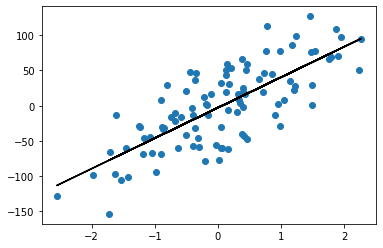

Done!


In [6]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

def gradient_descent_2(alpha, x, y, numIterations):
    m = x.shape[0] # number of samples
    theta = np.ones(2)
    x_transpose = x.transpose()
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # cost
        print( "iter %s | J: %.3f" % (iter, J) )     
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    return theta

if __name__ == '__main__':

    x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 
    m, n = np.shape(x)
    x = np.c_[ np.ones(m), x] # insert column
    alpha = 0.01 # learning rate
    theta = gradient_descent_2(alpha, x, y, 1000)

    # plot
    for i in range(x.shape[1]):
        y_predict = theta[0] + theta[1]*x 
    pylab.plot(x[:,1],y,'o')
    pylab.plot(x,y_predict,'k-')
    pylab.show()
    print ("Done!")